# Plotting

## Simple

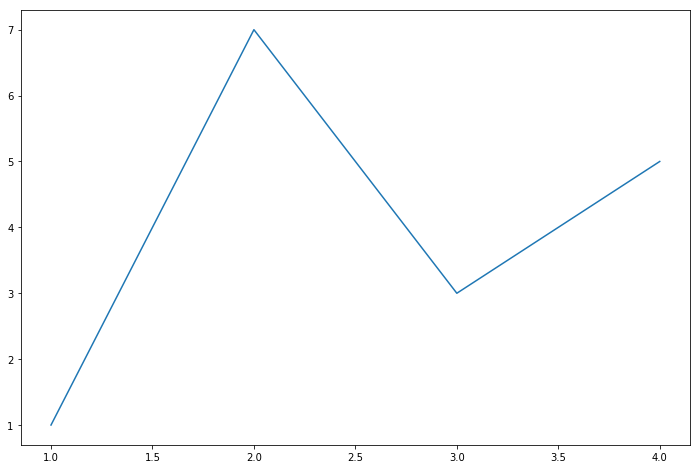

In [8]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (12,8) # Make figure bigger

pylab.figure(1)
pylab.plot([1,2,3,4], [1,7,3,5])
pylab.show() # or use pylab.savefig('filename.png') to save image to disk

## Savings with interest

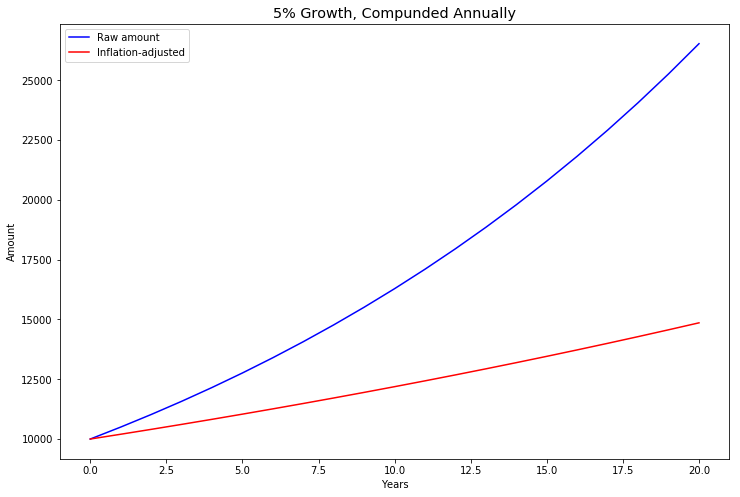

In [9]:
# A more complicated example
principal = 10000
amount = principal
interestRate = 0.05
inflation = 0.03
years = 20
values = []
corrected = []
for i in range(years + 1):
    values.append(amount)
    amount += amount*interestRate
amount = principal
for j in range(years +1):
    corrected.append(amount)
    amount += amount*(interestRate - inflation)
pylab.figure(2)
pylab.plot(values, 'b-', label='Raw amount') # blue line
pylab.plot(corrected, 'r-', label='Inflation-adjusted')
pylab.title('5% Growth, Compunded Annually', fontsize='x-large')
pylab.xlabel('Years')
pylab.ylabel('Amount')
pylab.legend(loc = 'best')
pylab.show()

## Flipping coins

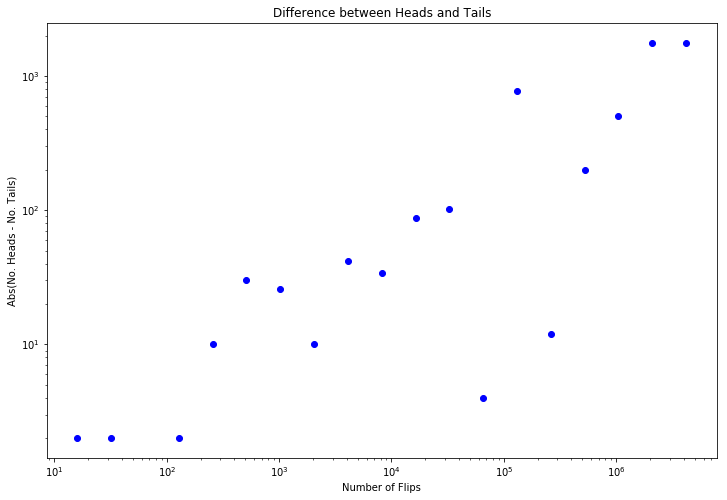

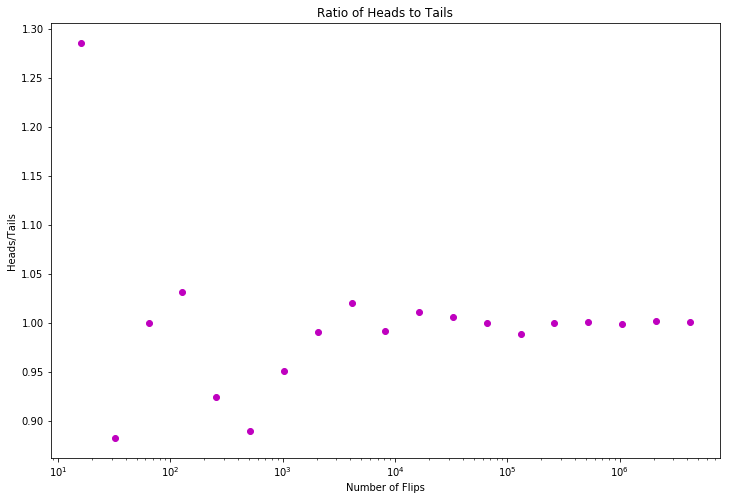

In [10]:
import random

def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
        Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = [] # Lists to store simulation results
    diffs  = []
    xAxis  = []
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp) # set no. flips for each trial
    for numFlips in xAxis:   # run the trials
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5: # 50% chance heads
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))

    # Plot figure 1, diff in numbers of heads and tails
    pylab.title('Difference between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(No. Heads - No. Tails)')
    pylab.semilogx()                    # <-- Log scale x axis
    pylab.semilogy()                    # <-- Log scale y axis
    pylab.plot(xAxis, diffs, 'bo')      # <-- Marker style 'bo'
    
    # Plot figure 2, ratio heads/tails
    pylab.figure() # Set up a new figure
    pylab.title('Ratio of Heads to Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.semilogx()                    # <-- Log scale x axis (but not y)
    pylab.plot(xAxis, ratios, 'mo')     # <-- Marker style 'mo'

random.seed(42) # Get the same result every time (on the same machine)
flipPlot(4,22)

## Spring data

In [11]:
import numpy as np 

def getData(fileName):
    with open(fileName, 'r') as dataFile:
        distances = []
        masses    = []
        discardHeader = dataFile.readline() # Get rid of header line
        for line in dataFile:               # Loop over lines in input file
            d, m = line.split(' ')          # Split input line on space
            distances.append(float(d))
            masses.append(float(m))
    return (masses, distances)

def fitData(inputFile, extend=False):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)      # Convert list to array
    masses    = pylab.array(masses)
    forces    = masses * 9.81   # Application of math to all members of array
        
    # Do some plotting
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Displacements of Spring')
    pylab.xlabel('Force (N)')
    pylab.ylabel('Distance (m)')
    pylab.xlim(0,15)
    pylab.ylim(-0.3, 0.5)
    
    # Find cubic fit
    a,b,c,d = pylab.polyfit(forces, distances, 3) # <- Note use of cubic fit
    
    fitForces = pylab.linspace(np.min(forces),np.max(forces),100)
    
    if extend: # Add some more x values to fit
        # The linspace() version
        fitForces = pylab.linspace(1,14,100) # 100 points evenly spaced from 1 to 14
        # Or just extend the existing array
        forces = pylab.append(forces, pylab.array(range(10,15)))
    
    fitDistances = a*(fitForces**3) + b*(fitForces**2) + c*fitForces + d
    predictedDistances = a*(forces**3) + b*(forces**2) + c*forces + d

    pylab.plot(fitForces, fitDistances, 'r-', label = 'Cubic fit (linsp)')
    pylab.plot(forces, predictedDistances, 'k:', label = 'Cubic fit')
    
    # Add a legend
    pylab.legend(loc = 'best')

    # Display the figure
    pylab.show()

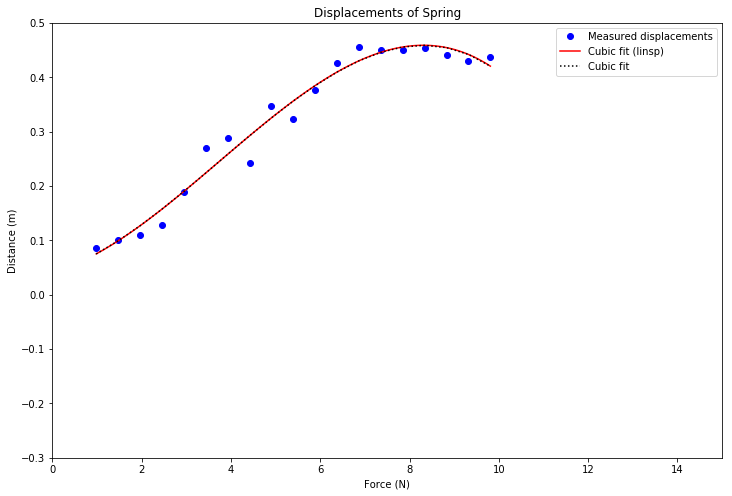

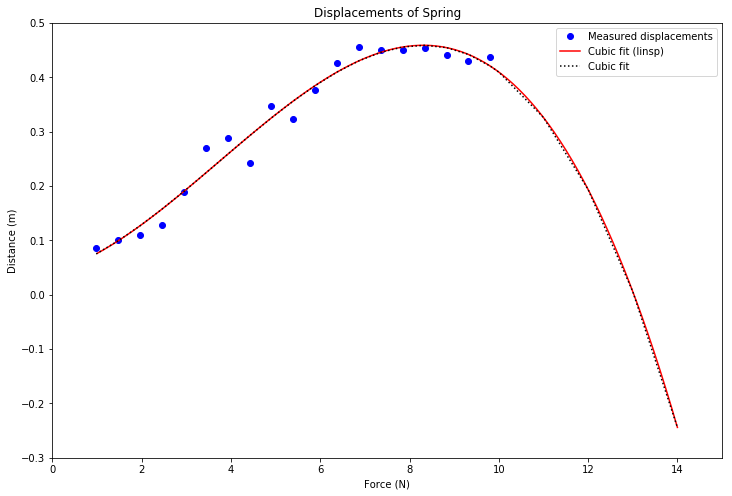

In [12]:
for i in [False, True]:
    fitData('springData.txt', extend=i)

## Seaborn

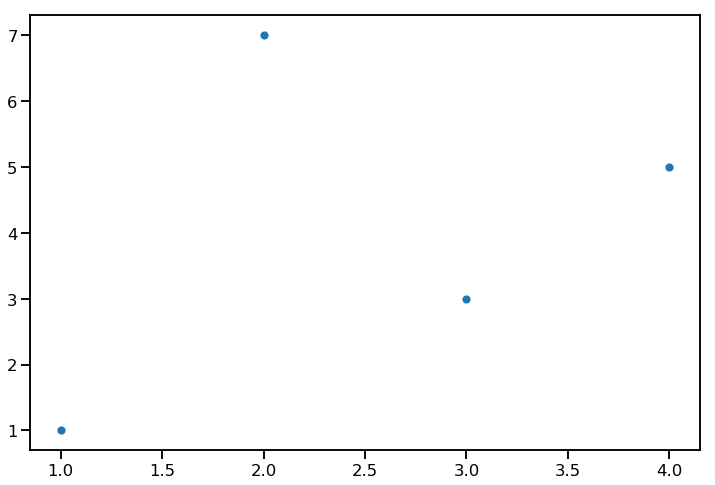

In [13]:
import seaborn as sns
sns.set_context('talk')

# The basics
x = [1,2,3,4]
y = [1,7,3,5]
sns.scatterplot(x, y);

/Users/mwilkens/anaconda3/envs/work/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


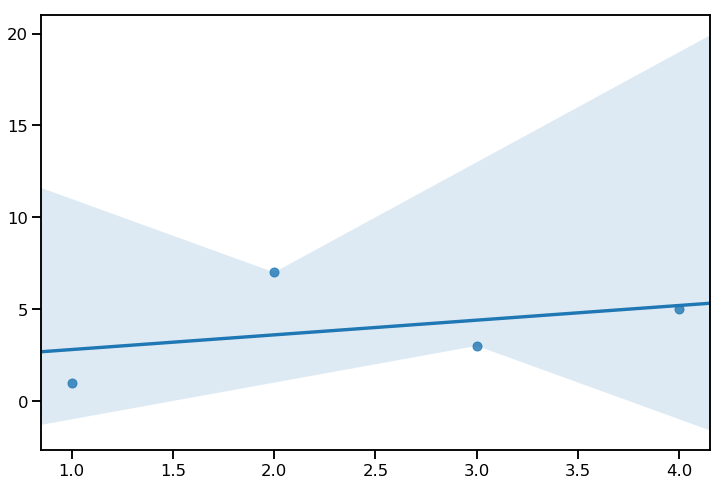

In [14]:
sns.regplot(x, y);

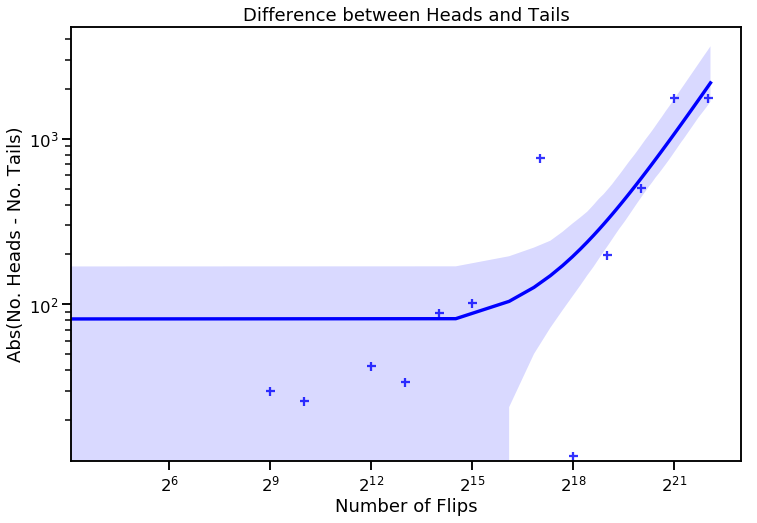

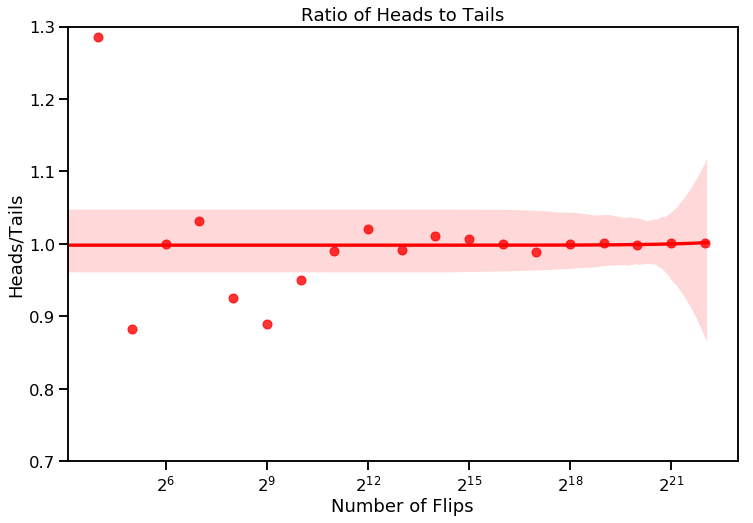

In [25]:
def flipPlotSeaborn(minExp, maxExp):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
        Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = [] # Lists to store simulation results
    diffs  = []
    xAxis  = []
    for exp in range(minExp, maxExp+1):
        xAxis.append(2**exp) # set no. flips for each trial
    for numFlips in xAxis:   # run the trials
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5: # 50% chance heads
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))

    # Plot figure 1, diff in numbers of heads and tails
    fig = sns.regplot(
        xAxis, 
        diffs, 
        color='blue', 
        marker='+'
    )
    fig.set_title('Difference between Heads and Tails')
    fig.set_xlabel('Number of Flips')
    fig.set_ylabel('Abs(No. Heads - No. Tails)')
    fig.semilogx(basex=2)                    # <-- Log scale x axis
    fig.semilogy()                    # <-- Log scale y axis
    pylab.show()
    
    # Plot figure 2, ratio heads/tails
    fig = sns.regplot(
        xAxis, 
        ratios, 
        color='red', 
        marker='o'
    )
    fig.set_title('Ratio of Heads to Tails')
    fig.set_xlabel('Number of Flips')
    fig.set_ylabel('Heads/Tails')
    fig.semilogx(basex=2)                    # <-- Log scale x axis (but not y)
    fig.set_ylim(0.7, 1.3)
    pylab.show()
    
random.seed(42) # Get the same result every time (on the same machine)
flipPlotSeaborn(4,22)